# CPS1988 dataset

Recommendation: Use `statsmodels` and `pandas` for this exercise.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

## Exercise a)

Briefly describe the data set:

- Name the dependent variable and the independent variables.
- Which scales of measurement do the variables belong to (e.g., nominal, ordinal, interval or ratio)?
- Does the data set consist of cross-sectional, time-series or panel data?

In [2]:
# Import and print the data
data = pd.read_csv("CPS1988.csv")
print(data.head())

     wage  education  experience ethnicity smsa     region parttime
0  354.94          7          45      cauc  yes  northeast       no
1  123.46         12           1      cauc  yes  northeast      yes
2  370.37          9           9      cauc  yes  northeast       no
3  754.94         11          46      cauc  yes  northeast       no
4  593.54         12          36      cauc  yes  northeast       no


## Exercise b)

Plot the dependent variable against each independent variable and transform the variables if necessary.

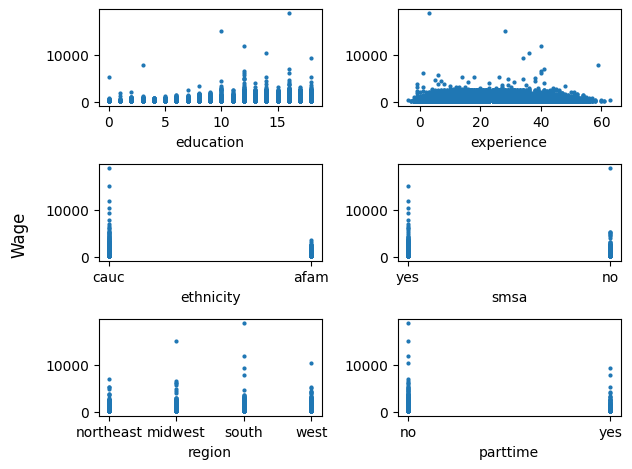

In [8]:
independent_variables = data.columns.drop("wage")

fig, axs = plt.subplots(3, 2)
for var, ax in zip(independent_variables, axs.reshape(-1)):
    ax.scatter(data[var], data["wage"], s=4)
    ax.set_xlabel(var)
fig.supylabel("Wage");
fig.tight_layout()

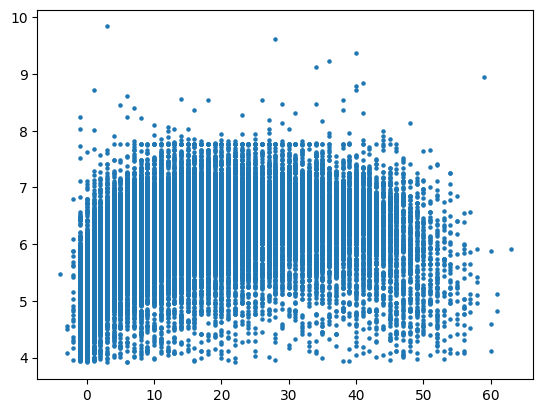

In [27]:
# scatter(data[var], data["wage"], s=4)
from numpy import log
plt.scatter(data["experience"], log(data["wage"]), s=5)


Which transformations would you carry out and why? 

Estimate the following model:

$$
  \ln( \hat{\text{wage}}_i ) = \hat\beta_0 + \hat\beta_1 \cdot \text{education}_i + \hat\beta_2 \cdot \text{ethnicity}_i + \hat\beta_3 \cdot \text{experience}_i\\
  \phantom{=} + \hat\beta_4 \cdot \text{experience}_i^2.
$$

In [4]:
# Build input data
X = data[["education", "ethnicity", "experience"]]
X["ethnicity"] = (X["ethnicity"] == "afam").astype(float)
X["experience^2"] = np.square(data["experience"])
X = sm.add_constant(X)

print(X.head())

   const  education  ethnicity  experience  experience^2
0    1.0          7        0.0          45          2025
1    1.0         12        0.0           1             1
2    1.0          9        0.0           9            81
3    1.0         11        0.0          46          2116
4    1.0         12        0.0          36          1296


/var/folders/qh/mlzmqwtn0pb40276h37j_y000000gn/T/ipykernel_6036/2447948317.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["ethnicity"] = (X["ethnicity"] == "afam").astype(float)
/var/folders/qh/mlzmqwtn0pb40276h37j_y000000gn/T/ipykernel_6036/2447948317.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["experience^2"] = np.square(data["experience"])


In [5]:
# Fit model
model = sm.OLS(np.log(data["wage"]), X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     3541.
Date:                Tue, 12 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:21:42   Log-Likelihood:                -24801.
No. Observations:               28155   AIC:                         4.961e+04
Df Residuals:                   28150   BIC:                         4.965e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.3214      0.019    225.375   

## Exercise c)

Interpret the model.
- Which variables are statistically significant?
- Is the entire model statistically significant?
- What is the explanatory power of the model and why?
- Interpret each regression coefficient.

## Exercise d)

Now consider the following alternative model:

$$
    \ln( \widehat{\text{wage}}_i ) = \hat\beta_0 + \hat\beta_1 \cdot \text{education}_i + \hat\beta_2 \cdot \text{ethnicity}_i + \hat\beta_3 \cdot \text{education}_i \cdot \text{ethnicity}_i\\
    \phantom{=} + \hat\beta_4 \cdot \text{experience}_i + \hat\beta_5 \cdot \text{experience}_i^2.
$$

What is the difference between both models?

## Exercise e)

Repeat c) with the alternative model.

In [28]:
# Build input data
X = data[["education", "ethnicity", "experience"]]
X["ethnicity"] = (X["ethnicity"] == "afam").astype(float)
X["ed*eth"] = X["education"] * X["ethnicity"]
X["experience^2"] = np.square(data["experience"])
X = sm.add_constant(X)

print(X.head())

   const  education  ethnicity  experience  ed*eth  experience^2
0    1.0          7        0.0          45     0.0          2025
1    1.0         12        0.0           1     0.0             1
2    1.0          9        0.0           9     0.0            81
3    1.0         11        0.0          46     0.0          2116
4    1.0         12        0.0          36     0.0          1296


/var/folders/qh/mlzmqwtn0pb40276h37j_y000000gn/T/ipykernel_6036/790995308.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["ethnicity"] = (X["ethnicity"] == "afam").astype(float)
/var/folders/qh/mlzmqwtn0pb40276h37j_y000000gn/T/ipykernel_6036/790995308.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["ed*eth"] = X["education"] * X["ethnicity"]
/var/folders/qh/mlzmqwtn0pb40276h37j_y000000gn/T/ipykernel_6036/790995308.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [29]:
# Fit model
model = sm.OLS(np.log(data["wage"]), X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     2834.
Date:                Tue, 12 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:58:24   Log-Likelihood:                -24799.
No. Observations:               28155   AIC:                         4.961e+04
Df Residuals:                   28149   BIC:                         4.966e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.3131      0.020    220.170   